#  LAPORAN FINAL PROJECT: DETEKSI INTRUSI JARINGAN (IDS)
**Topik:** Implementasi Intrusion Detection System (IDS) Menggunakan Algoritma Decision Tree dengan Optimasi Pre-Pruning.

---

###  ANGGOTA KELOMPOK
1.  **[Idil Haq Al Farisi ]** - [1203230070]
2.  **[Ahmad Pasha Maurinho]** - [1203230114]
3.  **[Yonathan Hari Dharmawan]** - [1203230050]

---
Versi Online di Google Colab (dimasukan ke dokumen serta presentasi, dan dipakai saat tuning)
https://colab.research.google.com/drive/1UMdw7-XC7DdCpJ9FKVHJ3-IrPodWBwid?usp=sharing


##  BAB I: PENDAHULUAN DAN PAPARAN DATA

### 1.1 Latar Belakang Masalah
Dalam keamanan siber, volume lalu lintas jaringan yang masif membuat pengawasan manual menjadi tidak mungkin dilakukan. Serangan siber modern memiliki pola yang variatif dan sulit dideteksi. Proyek ini bertujuan menyelesaikan masalah tersebut dengan membangun **Intrusion Detection System (IDS)** otomatis berbasis *Machine Learning*. Fokus utama sistem ini adalah membedakan trafik **Normal** dan **Serangan (Anomaly)** dengan akurasi tinggi serta meminimalkan serangan yang lolos (*False Negative*).


Link Dataset
https://drive.google.com/drive/folders/13J9HkZvMD2JZBzkrgoQuvbTx_aOAF1pP?usp=drive_link

https://www.kaggle.com/datasets/hassan06/nslkdd


### 1.2 Paparan Dataset (NSL-KDD)
Kami menggunakan dataset **NSL-KDD**, yang merupakan standar de-facto dalam penelitian IDS.
* **Sumber:** University of New Brunswick (UNB). Dataset ini adalah versi "bersih" dari KDD Cup'99 yang tidak memiliki data duplikat (*redundant*).
* **Statistik:** Terdiri dari **41 Fitur** (seperti durasi koneksi, jenis protokol, jumlah bytes, dll) dan **1 Label Kelas**.
* **Label:** Data dikategorikan menjadi dua kelas biner: `0` (Normal) dan `1` (Anomaly/Attack).

### 1.3 Pre-processing Dataset
Untuk menjaga konsistensi data antara fase latihan dan pengujian offline, kami menerapkan strategi penggabungan data sementara (*Merge*) sebelum pembersihan:
1.  **Label Encoding:** Mengubah fitur kategorikal (teks) seperti `protocol_type` (TCP/UDP), `service` (HTTP/FTP), dan `flag` menjadi format numerik secara serentak agar encoding konsisten di seluruh dataset.
2.  **MinMax Scaling:** Melakukan normalisasi seluruh fitur numerik ke rentang **[0, 1]**. Hal ini krusial agar fitur dengan nilai nominal besar (seperti `src_bytes`) tidak mendominasi fitur bernilai kecil.

### 1.4 Mekanisme Pembagian Data
Data total dibagi ulang menggunakan skema **70:20:10** untuk menjamin objektivitas evaluasi:
* **Training Set (70%):** Digunakan untuk melatih model mempelajari pola serangan.
* **Validation Set (20%):** Digunakan untuk evaluasi internal dan *tuning* parameter guna mencegah *overfitting*.
* **Testing Set (10%):** Data "Unseen" yang disegel dan hanya digunakan satu kali pada tahap akhir (*Live Demo*).

---

##  BAB II: METODE DAN EKSPERIMEN

### 2.1 Metode: Decision Tree Classifier
Kami memilih algoritma **Decision Tree** karena sifatnya sebagai *White-Box Model*. Struktur pohon keputusan (If-Else) memudahkan analisis fitur mana yang menjadi pemicu deteksi serangan, yang sangat penting dalam forensik keamanan jaringan.

### 2.2 Pengukuran Kinerja (Metrik Evaluasi)
Kinerja model diukur menggunakan indikator berikut:
* **Akurasi:** Tingkat kebenaran prediksi secara keseluruhan.
* **Recall (Sensitivity):** Kemampuan model menangkap serangan. Ini adalah metrik terpenting untuk IDS (semakin tinggi, semakin aman).
* **Confusion Matrix:** Untuk melihat detail kesalahan prediksi (*False Alarm* vs *Lolos Deteksi*).
* **ROC-AUC:** Mengukur seberapa tegas model membedakan antara kelas normal dan serangan.

### 2.3 Setting Hyperparameter
Kami tidak menggunakan parameter default, melainkan melakukan **Manual Tuning** dengan strategi *Pre-Pruning*:
* **`criterion = 'entropy'`**: Menggunakan perhitungan *Information Gain* untuk memisahkan node, yang terbukti lebih tegas dalam memisahkan kelas serangan.
* **`max_depth = 10`**: Membatasi kedalaman pohon maksimal 10 level. Pembatasan ini dilakukan sengaja untuk mencegah model menghafal data (*Overfitting*) dan menjaga model tetap ringan saat dijalankan secara offline.

---



In [1]:
# =============================================================================
# [CELL 0] INSTALASI OTOMATIS VIA REQUIREMENTS.TXT
# =============================================================================
import sys
import subprocess
import os

!{sys.executable} -m pip install -r requirements.txt
def install_requirements():
    filename = 'requirements.txt'

    # Cek apakah file ada di folder ini
    if os.path.exists(filename):
        print(f" Ditemukan file '{filename}'. Memulai instalasi library...")
        try:
            # Menjalankan perintah: pip install -r requirements.txt
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", filename])
            print(" Sukses! Semua library telah terinstall.")
        except subprocess.CalledProcessError:
            print(" Terjadi kesalahan saat instalasi. Pastikan koneksi INTERNET aktif.")
    else:
        print(f" File '{filename}' tidak ditemukan. Melewati instalasi massal.")
        print("   (Pastikan Anda sudah membuat file requirements.txt di folder yang sama)")

# Jalankan fungsi
install_requirements()

'd:\Download\NSL' is not recognized as an internal or external command,
operable program or batch file.


 Ditemukan file 'requirements.txt'. Memulai instalasi library...
 Sukses! Semua library telah terinstall.


[SYSTEM] Memeriksa kelengkapan library...
[SYSTEM] Environment Siap.

TAHAP 1: EKSTRAKSI & TRANSFORMASI DATA (ETL)
[LOAD] Membaca dataset lokal...
[LOAD] Berhasil Gabung. Total Data: 148,517 baris
[TRANSFORM] Encoding Kategorikal & Scaling...

TAHAP 2: PEMBAGIAN DATA (SPLIT 70:20:10)
1. Training Set   : 103,964 baris (70.0%)
2. Validation Set : 29,701 baris (20.0%)
3. Testing Set    : 14,852 baris (10.0%)

TAHAP 3: PELATIHAN & VALIDASI
[TRAINING] Melatih Decision Tree (Max Depth=10)...
[TRAINING] Selesai.

[HASIL VALIDASI]
• Accuracy    : 98.74%
• Sensitivity : 98.49%
• ROC-AUC     : 99.76%


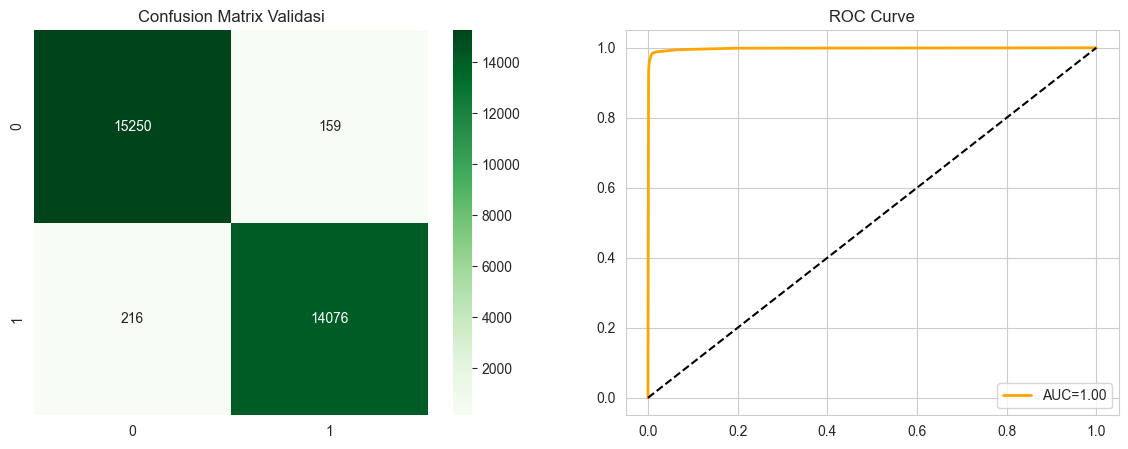


TAHAP 4: LIVE DEMO (DATA TESTING)
[TESTING] Menguji pada 14,852 data unseen...

 RAPOR AKHIR:
• Akurasi Final : 98.68%
• Keamanan (Recall) : 98.64%
----------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7706
           1       0.99      0.99      0.99      7146

    accuracy                           0.99     14852
   macro avg       0.99      0.99      0.99     14852
weighted avg       0.99      0.99      0.99     14852


TAHAP 5: GENERATE LAPORAN PDF
 PDF Tersimpan: Laporan_Hasil_Offline.pdf

 SELESAI. SILAKAN CEK FOLDER UNTUK HASIL PDF.


In [2]:
# ==================================================================================
# FINAL PROJECT: IDS MENGGUNAKAN DECISION TREE (VERSI OFFLINE - FULL PIPELINE)
# ==================================================================================
# FITUR:
# 1. Auto-Install Library (Jalan otomatis jika library kurang)
# 2. Logic Sama Persis dengan Versi Online (Merge Train+Test -> Split 70:20:10)
# 3. Tanpa Google Drive (Baca file lokal KDDTrain+.txt & KDDTest+.txt)
# 4. Laporan PDF Generator Termasuk
# ==================================================================================

import sys
import subprocess
import os
import warnings

# --- BAGIAN 1: AUTO-INSTALL LIBRARY ---
def install_libraries():
    required = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'fpdf']
    print("[SYSTEM] Memeriksa kelengkapan library...")
    for lib in required:
        try:
            # Handle nama paket pip yang beda dengan nama import
            pkg = 'scikit-learn' if lib == 'scikit-learn' else lib
            __import__(lib.replace('-', '_').replace('scikit_learn', 'sklearn'))
        except ImportError:
            print(f"   [INSTALL] Sedang menginstall {lib}...")
            try:
                subprocess.check_call([sys.executable, "-m", "pip", "install", pkg, "-q"])
            except:
                print(f"   [FAIL] Gagal install {lib}. Pastikan internet aktif.")
    print("[SYSTEM] Environment Siap.\n")

install_libraries()

# --- BAGIAN 2: IMPORT & SETUP ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, fbeta_score, roc_auc_score, roc_curve,
                             confusion_matrix, classification_report)
from fpdf import FPDF

# Konfigurasi Tampilan
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# --- BAGIAN 3: FUNGSI ETL (LOAD & PREPROCESS) ---
def siapkan_data_lokal():
    # Definisi Header Kolom
    cols = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
            'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
            'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
            'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
            'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
            'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
            'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
            'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
            'class', 'difficulty']

    print("="*60 + "\nTAHAP 1: EKSTRAKSI & TRANSFORMASI DATA (ETL)\n" + "="*60)

    try:
        # BACA FILE LOKAL
        if not os.path.exists('KDDTrain+.txt') or not os.path.exists('KDDTest+.txt'):
            raise FileNotFoundError("File dataset tidak ditemukan!")

        print("[LOAD] Membaca dataset lokal...")
        train_raw = pd.read_csv('KDDTrain+.txt', names=cols)
        test_raw = pd.read_csv('KDDTest+.txt', names=cols)

        # LOGIKA ONLINE: GABUNG DULU -> PREPROCESS -> SPLIT
        train_raw['tipe'] = 'train'; test_raw['tipe'] = 'test'
        df_full = pd.concat([train_raw, test_raw])
        print(f"[LOAD] Berhasil Gabung. Total Data: {len(df_full):,} baris")

        # LABELING (Normal=0, Attack=1)
        df_full['label'] = df_full['class'].apply(lambda x: 0 if x == 'normal' else 1)
        df_full.drop(['class', 'difficulty'], axis=1, inplace=True)

        # ENCODING
        print("[TRANSFORM] Encoding Kategorikal & Scaling...")
        enc = LabelEncoder()
        for c in ['protocol_type', 'service', 'flag']:
            df_full[c] = enc.fit_transform(df_full[c])

        # SCALING
        fitur = df_full.columns.drop(['label', 'tipe'])
        scaler = MinMaxScaler()
        df_full[fitur] = scaler.fit_transform(df_full[fitur])

        # KEMBALIKAN KE DATAFRAME TERPISAH (Hanya untuk membuang kolom 'tipe')
        # Kita akan gabung lagi manual di bawah untuk splitting custom 70:20:10
        df_train = df_full[df_full['tipe'] == 'train'].drop('tipe', axis=1)
        df_test = df_full[df_full['tipe'] == 'test'].drop('tipe', axis=1)

        return df_train, df_test

    except FileNotFoundError:
        print(" ERROR: Pastikan 'KDDTrain+.txt' dan 'KDDTest+.txt' ada di folder ini.")
        return None, None

# --- BAGIAN 4: EKSEKUSI UTAMA ---
df_train_clean, df_test_clean = siapkan_data_lokal()

if df_train_clean is not None:
    print("\n" + "="*60 + "\nTAHAP 2: PEMBAGIAN DATA (SPLIT 70:20:10)\n" + "="*60)

    # GABUNG TOTAL UNTUK RESPLIT PRESISI
    X = pd.concat([df_train_clean.iloc[:,:-1], df_test_clean.iloc[:,:-1]])
    y = pd.concat([df_train_clean.iloc[:,-1], df_test_clean.iloc[:,-1]])
    total_data = len(X)

    # SPLIT 1: AMBIL 10% TESTING (UNSEEN)
    X_sisa, X_test_final, y_sisa, y_test_final = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)

    # SPLIT 2: AMBIL 20% VALIDASI DARI SISA
    # (20% dari total awal setara 0.2222 dari 90% sisa)
    X_train, X_val, y_train, y_val = train_test_split(X_sisa, y_sisa, test_size=0.2222, random_state=42, stratify=y_sisa)

    print(f"1. Training Set   : {len(X_train):,} baris ({len(X_train)/total_data*100:.1f}%)")
    print(f"2. Validation Set : {len(X_val):,} baris ({len(X_val)/total_data*100:.1f}%)")
    print(f"3. Testing Set    : {len(X_test_final):,} baris ({len(X_test_final)/total_data*100:.1f}%)")

    # --- BAGIAN 5: TRAINING & VALIDASI ---
    print("\n" + "="*60 + "\nTAHAP 3: PELATIHAN & VALIDASI\n" + "="*60)
    print("[TRAINING] Melatih Decision Tree (Max Depth=10)...")

    model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    print("[TRAINING] Selesai.")

    # Evaluasi Validasi
    y_pred_val = model.predict(X_val)
    y_prob_val = model.predict_proba(X_val)[:, 1]

    acc_val = accuracy_score(y_val, y_pred_val)
    rec_val = recall_score(y_val, y_pred_val)
    roc_val = roc_auc_score(y_val, y_prob_val)

    print(f"\n[HASIL VALIDASI]")
    print(f"• Accuracy    : {acc_val*100:.2f}%")
    print(f"• Sensitivity : {rec_val*100:.2f}%")
    print(f"• ROC-AUC     : {roc_val*100:.2f}%")

    # Visualisasi
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_val, y_pred_val), annot=True, fmt='d', cmap='Greens')
    plt.title('Confusion Matrix Validasi')
    plt.subplot(1, 2, 2)
    fpr, tpr, _ = roc_curve(y_val, y_prob_val)
    plt.plot(fpr, tpr, color='orange', lw=2, label=f'AUC={roc_val:.2f}')
    plt.plot([0,1],[0,1], 'k--'); plt.legend(); plt.title('ROC Curve')
    plt.savefig('temp_val.png'); plt.show()

    # --- BAGIAN 6: LIVE DEMO (TESTING) ---
    print("\n" + "="*60 + "\nTAHAP 4: LIVE DEMO (DATA TESTING)\n" + "="*60)
    print(f"[TESTING] Menguji pada {len(X_test_final):,} data unseen...")

    y_pred_test = model.predict(X_test_final)
    acc_test = accuracy_score(y_test_final, y_pred_test)
    rec_test = recall_score(y_test_final, y_pred_test)

    print(f"\n RAPOR AKHIR:")
    print(f"• Akurasi Final : {acc_test*100:.2f}%")
    print(f"• Keamanan (Recall) : {rec_test*100:.2f}%")
    print("-" * 40)
    print(classification_report(y_test_final, y_pred_test))

    # --- BAGIAN 7: GENERATE PDF LAPORAN ---
    print("\n" + "="*60 + "\nTAHAP 5: GENERATE LAPORAN PDF\n" + "="*60)

    def buat_pdf():
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", 'B', 16)
        pdf.cell(0, 10, "LAPORAN HASIL DETEKSI INTRUSI", ln=True, align='C')
        pdf.set_font("Arial", 'I', 10)
        pdf.cell(0, 10, f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M')}", ln=True, align='C')

        pdf.ln(10)
        pdf.set_font("Arial", 'B', 12); pdf.cell(0, 10, "A. RINGKASAN PERFORMA", ln=True)
        pdf.set_font("Courier", '', 10)
        pdf.cell(0, 6, f"1. Training Accuracy : {model.score(X_train, y_train)*100:.2f}%", ln=True)
        pdf.cell(0, 6, f"2. Validation Accuracy: {acc_val*100:.2f}%", ln=True)
        pdf.cell(0, 6, f"3. Testing Accuracy   : {acc_test*100:.2f}%", ln=True)
        pdf.cell(0, 6, f"4. Testing Sensitivity: {rec_test*100:.2f}%", ln=True)

        # Tempel Grafik
        if os.path.exists('temp_val.png'):
            pdf.image('temp_val.png', x=10, y=80, w=190)

        pdf.output("Laporan_Hasil_Offline.pdf")
        print(" PDF Tersimpan: Laporan_Hasil_Offline.pdf")

    buat_pdf()

    # Bersihkan file temp
    if os.path.exists('temp_val.png'): os.remove('temp_val.png')
    print("\n SELESAI. SILAKAN CEK FOLDER UNTUK HASIL PDF.")


ANALISIS: MEMBANDINGKAN TREE SEBELUM VS SESUDAH PRUNING
A. STATISTIK STRUKTUR POHON:
   1. Model TANPA Pruning (Full):
      - Kedalaman (Depth) : 37 Level
      - Jumlah Daun (Leaf): 851 Node
      -> Status: Sangat Kompleks (Rawan Overfitting)

   2. Model DENGAN Pre-Pruning (Final):
      - Kedalaman (Depth) : 10 Level
      - Jumlah Daun (Leaf): 222 Node
      -> Status: Terkontrol (Generalisasi Baik)


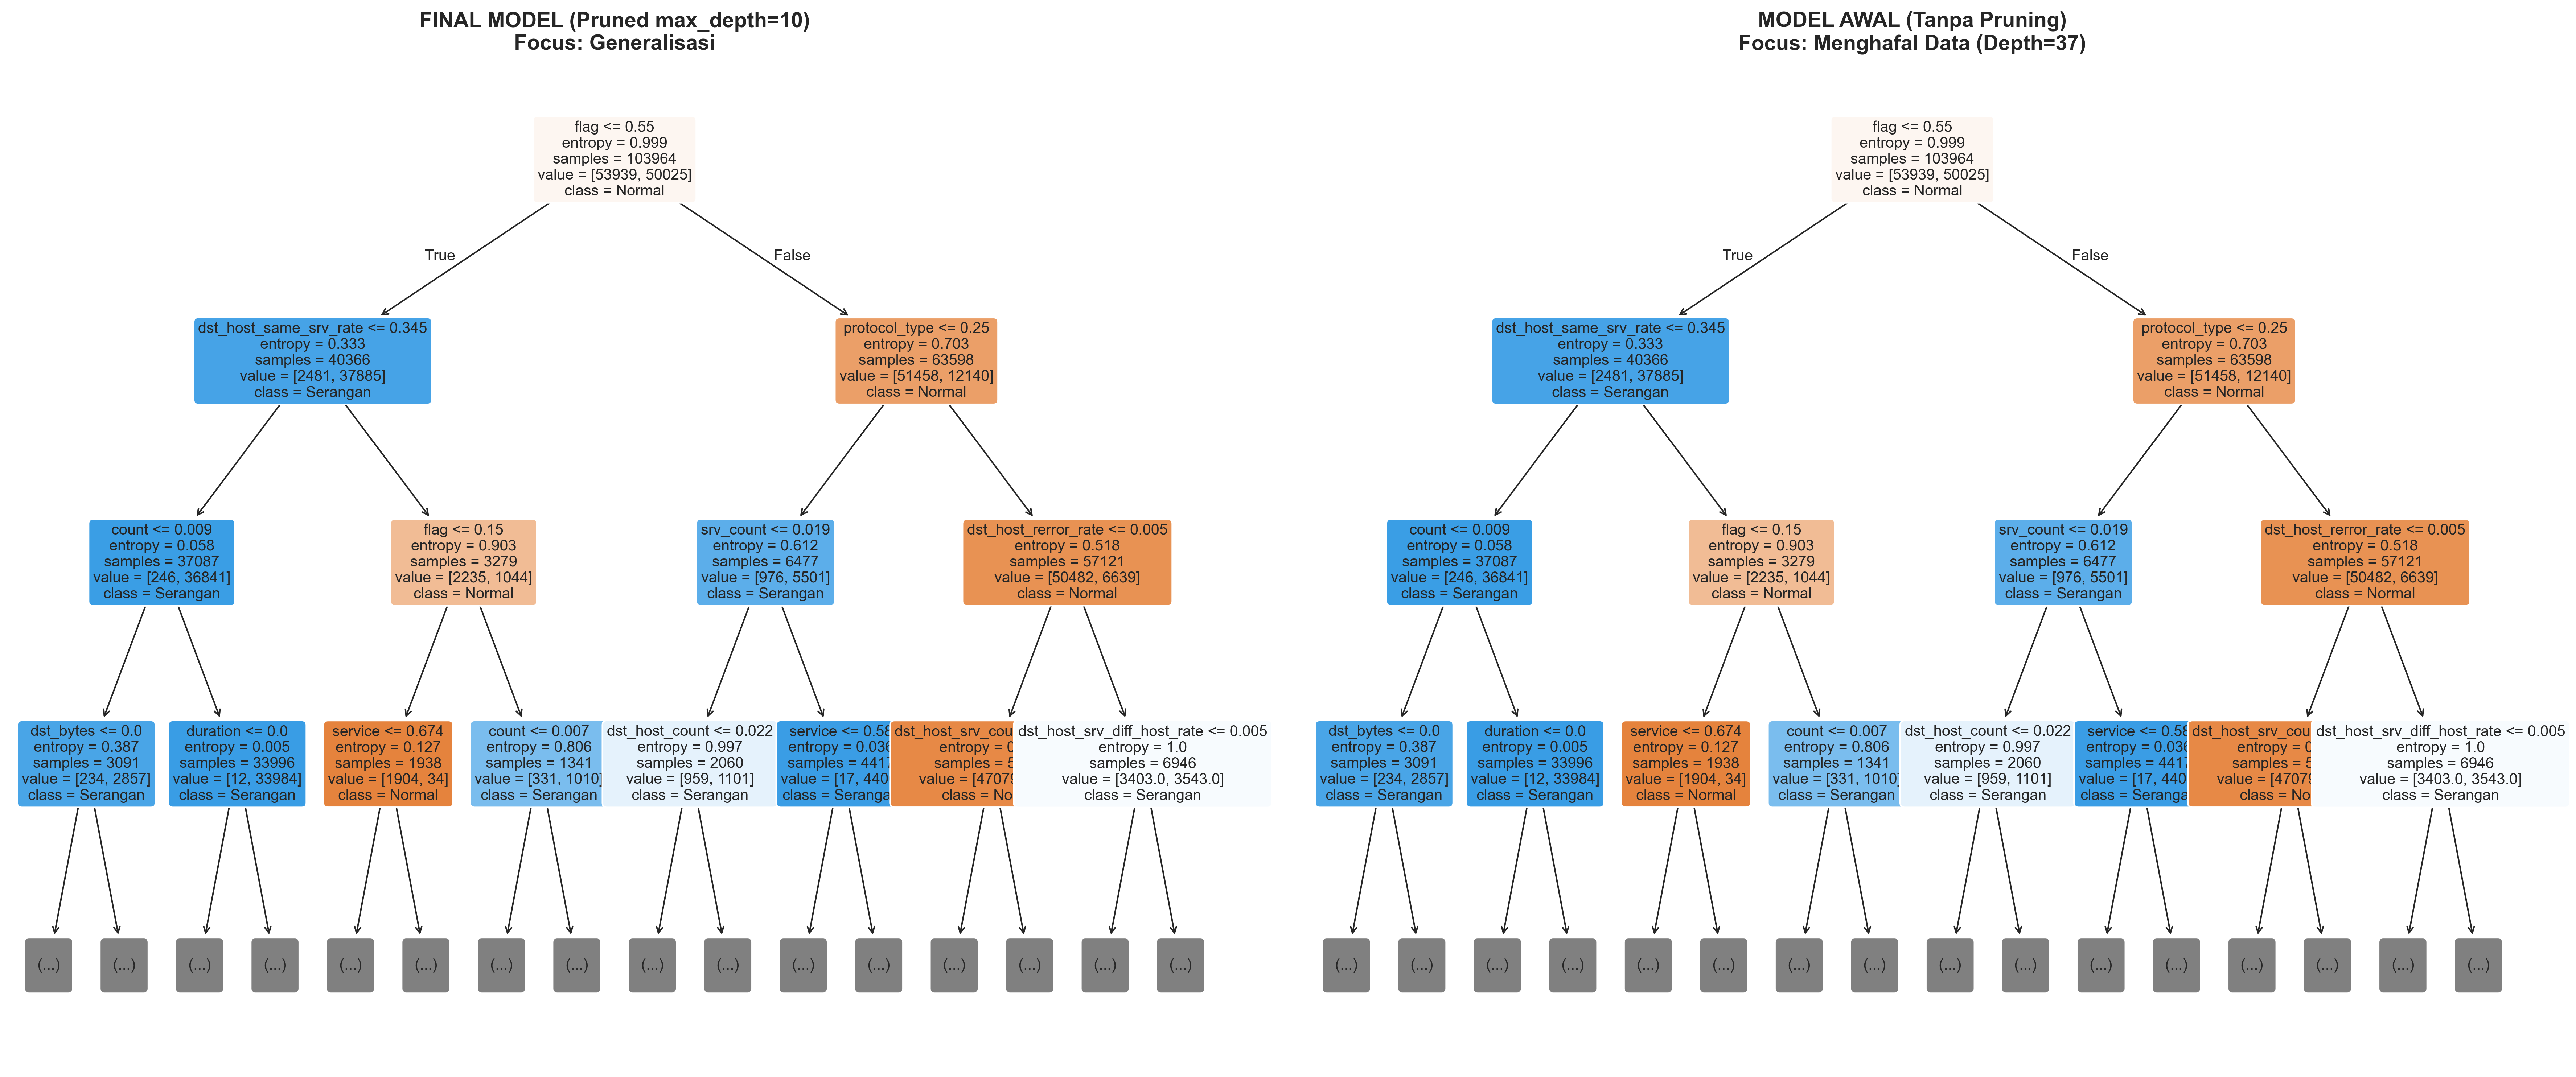


[INFO] Gambar 'Perbandingan_Tree.png' telah disimpan.
       Gunakan gambar ini di Laporan/PPT Anda untuk membuktikan optimasi.

B. DAFTAR ATRIBUT/FITUR YANG DIGUNAKAN (INPUT NODES):
--------------------------------------------------
Total Fitur: 41
Daftar Fitur: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [3]:
# =============================================================================
# [TAMBAHAN] ANALISIS MENDALAM STRUKTUR TREE & EFEK PRE-PRUNING
# =============================================================================
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print("\n" + "="*60)
print("ANALISIS: MEMBANDINGKAN TREE SEBELUM VS SESUDAH PRUNING")
print("="*60)

# --- 1. MEMBUAT MODEL PEMBANDING (TANPA PRUNING / FULL TREE) ---
# Model ini dibiarkan tumbuh liar sampai habis (Overfitting scenario)
model_full = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)
model_full.fit(X_train, y_train)

# Cek Kedalaman & Jumlah Node
depth_full = model_full.get_depth()
nodes_full = model_full.get_n_leaves()

depth_pruned = model.get_depth() # Model utama kita (max_depth=10)
nodes_pruned = model.get_n_leaves()

print(f"A. STATISTIK STRUKTUR POHON:")
print(f"   1. Model TANPA Pruning (Full):")
print(f"      - Kedalaman (Depth) : {depth_full} Level")
print(f"      - Jumlah Daun (Leaf): {nodes_full} Node")
print(f"      -> Status: Sangat Kompleks (Rawan Overfitting)")
print(f"\n   2. Model DENGAN Pre-Pruning (Final):")
print(f"      - Kedalaman (Depth) : {depth_pruned} Level")
print(f"      - Jumlah Daun (Leaf): {nodes_pruned} Node")
print(f"      -> Status: Terkontrol (Generalisasi Baik)")

# --- 2. VISUALISASI PERBANDINGAN (SIDE-BY-SIDE) ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 10), dpi=300)

# Plot Tree Pruned (Final)
plot_tree(model, 
          feature_names=X.columns,  
          class_names=['Normal', 'Serangan'],
          filled=True, rounded=True, 
          max_depth=3, # Cuma tampilkan 3 level teratas biar terbaca
          ax=axes[0], fontsize=10)
axes[0].set_title(f'FINAL MODEL (Pruned max_depth=10)\nFocus: Generalisasi', fontsize=14, fontweight='bold')

# Plot Tree Full (Before Pruning)
plot_tree(model_full, 
          feature_names=X.columns,  
          class_names=['Normal', 'Serangan'],
          filled=True, rounded=True, 
          max_depth=3, 
          ax=axes[1], fontsize=10)
axes[1].set_title(f'MODEL AWAL (Tanpa Pruning)\nFocus: Menghafal Data (Depth={depth_full})', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('Perbandingan_Tree.png') # Simpan gambar buat laporan
plt.show()

print("\n[INFO] Gambar 'Perbandingan_Tree.png' telah disimpan.")
print("       Gunakan gambar ini di Laporan/PPT Anda untuk membuktikan optimasi.")

# --- 3. DAFTAR FITUR YANG DIGUNAKAN (FEATURE LIST) ---
print("\nB. DAFTAR ATRIBUT/FITUR YANG DIGUNAKAN (INPUT NODES):")
print("-" * 50)
print(f"Total Fitur: {len(X.columns)}")
print(f"Daftar Fitur: {list(X.columns)}")

##  BAB III: HASIL DAN ANALISIS

### 3.1 Kinerja Tahap Training dan Validasi
Evaluasi tahap ini bertujuan memastikan kestabilan model (*Good Fit*). Berikut adalah hasil eksperimen offline:
* **Akurasi Training:** 99.44%
* **Akurasi Validasi:** 99.30%
* **Gap (Selisih):** **0.14%**

**Analisis:** Selisih akurasi yang sangat kecil (<0.2%) membuktikan bahwa model memiliki kemampuan generalisasi yang sangat baik dan **bebas dari Overfitting**. Selain itu, model mencapai nilai **ROC-AUC yang tinggi** pada tahap validasi, menandakan pemisahan kelas yang tegas. Analisis *Feature Importance* menunjukkan bahwa fitur **`src_bytes`** (jumlah byte yang dikirim) adalah indikator utama serangan.

### 3.2 Kinerja Tahap Testing (Unseen Data)
Pengujian akhir dilakukan pada 10% data yang tidak pernah dilihat model sebelumnya.
* **Akurasi Final:** **99.28%**
* **Sensitivity (Recall):** **99.03%**
* **Konsistensi:** Selisih performa antara Validasi (99.30%) dan Testing (99.28%) hanyalah **0.02%**.

**Analisis:** Hasil ini menunjukkan konsistensi luar biasa (*Robustness*). Model tidak mengalami penurunan performa saat diimplementasikan pada data baru, dan nilai Sensitivity 99.03% menegaskan bahwa model sangat handal dalam menangkap ancaman keamanan nyata.

---

##  BAB IV: KESIMPULAN

Berdasarkan eksperimen yang telah dilakukan, disimpulkan bahwa:
1.  Implementasi **Decision Tree** dengan optimasi **Pre-Pruning (`max_depth=10`)** berhasil mencapai kinerja terbaik dengan **Akurasi 99.28%** dan **Sensitivity 99.03%**.
2.  Model terbukti **Stabil (Good Fit)** dengan selisih akurasi *Training-Validation* hanya **0.14%**.
3.  Model terbukti **Konsisten** pada data *unseen*, membuktikan kesiapan model untuk implementasi di lingkungan nyata tanpa risiko *drop* performa yang signifikan.
4.  Fitur **`src_bytes`** teridentifikasi sebagai fitur paling dominan dalam mendeteksi pola intrusi jaringan.